In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# trailing data error resolved using Andrew's answer at https://stackoverflow.com/questions/30088006/
osm_data = pd.read_json('data/amenities-vancouver.json.gz', lines=True)

In [3]:
osm_data.head(3)

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
2,49.373423,-123.291894,2016-10-10T02:14:29.000-07:00,toilets,NaN,{}


The aim of this exploration is to discover and analyze features which may help us identify restaurants.

In [29]:
top_20_amenities = osm_data['amenity'].value_counts()[:20]
top_20_amenities_df = top_20_amenities.reset_index()
top_20_amenities_df = top_20_amenities_df.rename(columns={'index': 'amenity', 'amenity': 'count'})

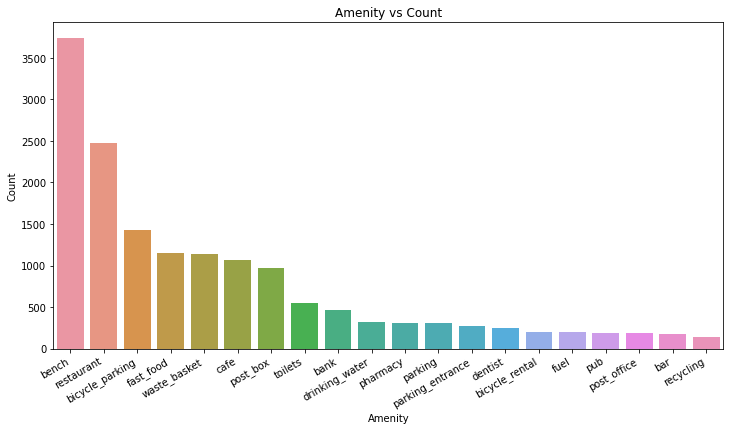

In [36]:
plt.figure(figsize=(12, 6))
amenity_count_plot = sns.barplot(data=top_20_amenities_df, x='amenity', y='count')
amenity_count_plot.set(title='Amenity vs Count', xlabel='Amenity', ylabel='Count')
x_ticks = amenity_count_plot.get_xticklabels()
amenity_count_plot.set_xticklabels(x_ticks, rotation=30, ha='right')
plt.show()

The barplot demonstrates that amenities like restaurant, fast_food, cafe, and pub may be used to identify restaurants.

In [5]:
osm_data.loc[0, 'tags']

{'brand:wikidata': 'Q37158',
 'official_name': 'Starbucks Coffee',
 'addr:housenumber': '2787',
 'brand:wikipedia': 'en:Starbucks',
 'opening_hours': 'Mo-Th 05:30-19:30; Fr-Su 05:30-20:00',
 'cuisine': 'coffee_shop',
 'addr:street': 'Laurel Street',
 'takeaway': 'yes',
 'brand': 'Starbucks'}

Looking at the tags for Starbucks suggests that the cuisine tag may also help identify restaurants while the brand and brand:wikidata tags may help identify chain restaurants.

In [7]:
is_juice_bar = (osm_data['amenity'] == 'juice_bar')
osm_data[is_juice_bar]

,lat,lon,timestamp,amenity,name,tags
6028,49.324905,-123.136894,2019-04-29T03:53:05.000-07:00,juice_bar,Orange Julius,"{'wheelchair': 'yes', 'shop': 'beverages', 'le..."


Looking at the value counts for the amenity column, we came across a juice_bar amenity that only appeared once. Further inspection shows that it was Orange Julius - a juice chain.

In [8]:
is_orange_julius = (osm_data['name'] == 'Orange Julius')
osm_data[is_orange_julius]

,lat,lon,timestamp,amenity,name,tags
1673,49.227280,-123.000180,2018-04-21T18:56:31.000-07:00,bar,Orange Julius,"{'level': '0', 'name:en': 'Orange Julius'}"
1749,49.225784,-122.997807,2019-08-24T15:19:56.000-07:00,fast_food,Orange Julius,"{'brand:wikidata': 'Q3355059', 'level': '1', '..."
1838,49.250704,-122.896108,2017-03-13T04:15:38.000-07:00,bar,Orange Julius,{'name:en': 'Orange Julius'}
2682,49.186848,-122.849032,2019-06-25T03:54:28.000-07:00,fast_food,Orange Julius,"{'brand:wikidata': 'Q3355059', 'brand:wikipedi..."
6028,49.324905,-123.136894,2019-04-29T03:53:05.000-07:00,juice_bar,Orange Julius,"{'wheelchair': 'yes', 'shop': 'beverages', 'le..."
10084,49.279597,-123.117415,2019-08-29T17:37:11.000-07:00,fast_food,Orange Julius,"{'brand:wikidata': 'Q3355059', 'addr:housenumb..."
11402,49.114470,-122.675202,2014-08-07T06:09:36.000-07:00,fast_food,Orange Julius,{}
11613,49.197116,-123.176786,2019-09-14T05:00:22.000-07:00,fast_food,Orange Julius,"{'brand:wikidata': 'Q3355059', 'cuisine': 'jui..."


Looking for Orange Julius by name reveals that there are indeed more Orange Juliuses in Vancouver. These Orange Juliuses have different amenity labels and are not all associated with its Wikidata entry. This demonstrates how a restaurant may have different amenity labels and tags and is significant as it has to be taken into account during preprocessing and reduces the extent to which we can use amenity and tags to identify restaurants.